In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MD_agric_exam-4313.csv')
df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [7]:
# Write code to determine the number of unique crop types in the dataset?
df['Crop_type'].nunique()

8

In [9]:
# Identify the maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places).
round(df[df['Crop_type'] == 'wheat']['Annual_yield'].max(), 2)

8.99

In [15]:
# Find the total rainfall for crop types where the average pollution level is above 0.2. 
df[df['Pollution_level'] > 0.2]['Rainfall'].sum()

478902.6

In [22]:
# Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) 
# for each farmer's field. Then, call the function with the following 
# `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

def temperature_range(df, field_id):
  return df[df['Field_ID'] == field_id]['Max_temperature_C'] - df[df['Field_ID'] == field_id]['Min_temperature_C']

print(temperature_range(df, 1458))
print(temperature_range(df, 1895))
print(temperature_range(df, 5443))

135    40.7
dtype: float64
644    35.7
dtype: float64
892    33.4
dtype: float64


In [27]:
# What does the following code achieve?

a = df['Crop_type'].unique()
b = float('inf')
c = ''

for crop in a:
    d = df[df['Crop_type'] == crop]['Min_temperature_C'].mean()
    print(crop, d)
    if d < b:
        b = d
        c = crop
print(c)

coffee -4.165656565656565
potato -4.57054794520548
banana -5.389320388349515
wheat -5.060655737704919
cassava -4.080141843971631
maize -4.31219512195122
tea -2.8854014598540147
rice -6.464583333333333
rice


In [29]:
# Write code to calculate the total plot size for plots where the pH is less than 5.5.
round(df[df['pH'] < 5.5]['Plot_size'].sum(), 1)

1731.9

In [31]:
temperature_filtered_df = df[
  (df['Min_temperature_C'] < -5)
  &
  (df['Max_temperature_C'] > 30)
]
temperature_filtered_df.shape[0]

319

In [36]:
# Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 
# 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).

import numpy as np

median_plot_size = np.median(df['Plot_size'])

np.round(np.std(df[df['Plot_size'] > median_plot_size]['Rainfall']), 2)

469.62

In [42]:
"""
If you concatenate the first three digits of the most common 
'Max_temperature_C' with the last three letters of the least common 'Crop_type', what string do you get?
Note: Use the first mode if there are multiple modes
"""
most_common_max_temp = df['Max_temperature_C'].mode()[0]
least_common_crop_type = df['Crop_type'].value_counts().idxmin()

result = str(most_common_max_temp)[:3] + least_common_crop_type[-3:]
result

'30.ice'

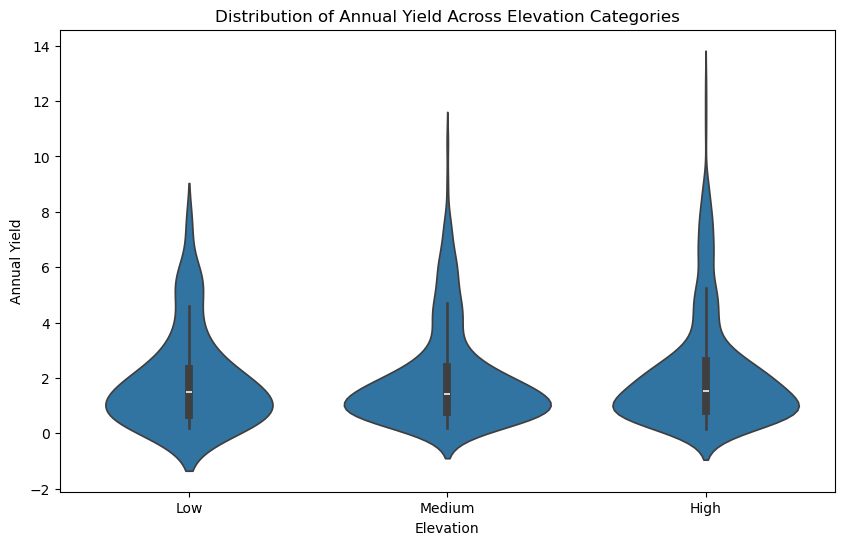

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

bins = [0, 300, 600, float('inf')]
labels = ['Low', 'Medium', 'High'] 
df['Elevation'] = pd.cut(df['Elevation'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation', y='Annual_yield', data=df)

plt.title('Distribution of Annual Yield Across Elevation Categories')
plt.xlabel('Elevation')
plt.ylabel('Annual Yield')
plt.show()

In [53]:
crops = list(df['Crop_type'].unique())
print(crops)
print([len(x) for x in crops])
crops_total = sum([len(x) for x in crops])
crops_total

['coffee', 'potato', 'banana', 'wheat', 'cassava', 'maize', 'tea', 'rice']
[6, 6, 6, 5, 7, 5, 3, 4]


42

In [61]:
# Write Python code to perform a t-test comparing the average 
# 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. 
# What is the p-value, rounded to three decimal places?

from scipy.stats import ttest_ind

mean_coffee = df[df['Crop_type'] == 'coffee']['Annual_yield']
mean_banana = df[df['Crop_type'] == 'banana']['Annual_yield']

t_stat, p_val = ttest_ind(mean_coffee, mean_banana, equal_var=False)

round(p_val, 3)

0.598